<html>
<head>
</head>
<body>
<h1>
import nessisary liberary
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , ConfusionMatrixDisplay
from skimage import color, feature, exposure
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

<html>
<head>
</head>
<body>
<h1>
load data
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [17]:
# load the data
data_train = pd.read_csv('train.csv')
data_train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


<html>
<head>
</head>
<body>
<h1>
preprocessing
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [18]:
# make the datset to an array of images of pixels 
image_array =[]
for i, row in enumerate(data_train.index):
        image = np.fromstring(data_train.loc[row, 'pixels'], dtype=int, sep=' ')
        image_array.append(image.flatten())

In [19]:
image_array

[array([ 70,  80,  82, ..., 106, 109,  82]),
 array([151, 150, 147, ..., 193, 183, 184]),
 array([231, 212, 156, ...,  88, 110, 152]),
 array([ 24,  32,  36, ..., 142, 143, 142]),
 array([ 4,  0,  0, ..., 30, 29, 30]),
 array([55, 55, 55, ..., 34, 30, 57]),
 array([ 20,  17,  19, ...,  99, 107, 118]),
 array([ 77,  78,  79, ..., 125,  67,  68]),
 array([85, 84, 90, ..., 58, 73, 84]),
 array([255, 254, 255, ..., 254, 255, 255]),
 array([ 30,  24,  21, ..., 172, 173, 173]),
 array([39, 75, 78, ..., 84, 83, 87]),
 array([219, 213, 206, ...,   0,   0,   0]),
 array([148, 144, 130, ..., 112, 111, 111]),
 array([ 4,  2, 13, ...,  3,  7, 12]),
 array([107, 107, 109, ...,  83,  84, 106]),
 array([14, 14, 18, ...,  9, 10, 10]),
 array([255, 255, 255, ...,  79,  79,  83]),
 array([134, 124, 167, ...,  34,  28, 139]),
 array([219, 192, 179, ...,  57,  39,  40]),
 array([  1,   1,   1, ..., 213, 211, 215]),
 array([174,  51,  37, ...,   7,  11,  16]),
 array([123, 125, 124, ...,  97,  91,  89]),
 

In [20]:
image_array[0].shape

(2304,)

In [21]:
lables = np.array(data_train['emotion']).tolist()
lables

[0,
 0,
 2,
 4,
 6,
 2,
 4,
 3,
 3,
 2,
 0,
 6,
 6,
 6,
 3,
 5,
 3,
 2,
 6,
 4,
 4,
 2,
 0,
 0,
 3,
 3,
 5,
 0,
 3,
 5,
 3,
 6,
 3,
 2,
 3,
 6,
 6,
 6,
 0,
 5,
 0,
 3,
 4,
 0,
 6,
 2,
 3,
 6,
 2,
 2,
 2,
 5,
 5,
 6,
 4,
 5,
 0,
 3,
 4,
 2,
 6,
 5,
 3,
 4,
 3,
 0,
 4,
 3,
 0,
 5,
 4,
 2,
 4,
 2,
 0,
 6,
 0,
 0,
 5,
 4,
 3,
 5,
 3,
 6,
 2,
 2,
 4,
 4,
 5,
 4,
 0,
 0,
 6,
 0,
 6,
 2,
 2,
 3,
 4,
 3,
 3,
 2,
 6,
 3,
 4,
 3,
 2,
 0,
 2,
 3,
 2,
 3,
 6,
 6,
 3,
 4,
 4,
 0,
 3,
 3,
 0,
 2,
 0,
 0,
 3,
 3,
 0,
 4,
 5,
 2,
 4,
 2,
 5,
 3,
 0,
 6,
 6,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 0,
 0,
 2,
 6,
 3,
 4,
 5,
 3,
 0,
 2,
 4,
 5,
 2,
 3,
 4,
 6,
 3,
 4,
 3,
 6,
 0,
 4,
 4,
 4,
 2,
 6,
 5,
 5,
 6,
 5,
 2,
 3,
 2,
 3,
 4,
 0,
 2,
 0,
 3,
 0,
 2,
 2,
 5,
 3,
 5,
 5,
 4,
 3,
 0,
 6,
 5,
 2,
 6,
 0,
 0,
 4,
 5,
 6,
 3,
 5,
 5,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 6,
 3,
 6,
 3,
 0,
 6,
 3,
 2,
 0,
 6,
 5,
 6,
 0,
 5,
 4,
 3,
 0,
 3,
 0,
 4,
 5,
 4,
 3,
 3,
 0,
 0,
 6,
 2,
 0,
 6,
 3,
 0,
 0,


In [22]:
flat_images = np.array(image_array)
target = np.array(lables)

# normalization
flat_images = flat_images / 255

<html>
<head>
</head>
<body>
<h1>
show some images
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

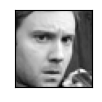

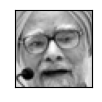

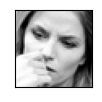

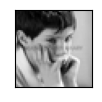

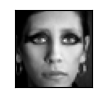

In [23]:
for i in range(5):
    plt.figure(figsize=(1, 2))
    plt.imshow(image_array[i].reshape(48,48), cmap=plt.cm.gray)
    # remove ticks
    plt.xticks([])
    plt.yticks([])
    plt.show()

<html>
<head>
</head>
<body>
<h1>
convert it into a dataframe
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [24]:
df = pd.DataFrame(flat_images)
df['target']=target

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,0
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,0
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,4
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,0.329412,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.337255,0.337255,...,0.133333,0.137255,0.141176,0.156863,0.105882,0.490196,0.905882,0.843137,0.784314,2
28705,0.447059,0.439216,0.443137,0.443137,0.435294,0.435294,0.439216,0.443137,0.450980,0.443137,...,0.368627,0.419608,0.470588,0.552941,0.564706,0.517647,0.505882,0.713725,0.870588,0
28706,0.290196,0.317647,0.341176,0.349020,0.372549,0.392157,0.384314,0.364706,0.411765,0.470588,...,0.839216,0.827451,0.819608,0.784314,0.764706,0.752941,0.737255,0.733333,0.733333,4
28707,0.870588,0.890196,0.796078,0.352941,0.337255,0.352941,0.329412,0.301961,0.368627,0.341176,...,0.545098,0.552941,0.568627,0.537255,0.545098,0.533333,0.533333,0.533333,0.525490,0


<html>
<head>
</head>
<body>
<h1>
drop some rows to be only 5 classes
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [26]:
df= df[df['target'] != 5]
df= df[df['target'] != 6]

In [27]:
# names of classes
df['target'].unique()

array([0, 2, 4, 3, 1])

In [28]:
count0= len(df[df['target'] == 0])
count1= len(df[df['target'] == 1])
count2= len(df[df['target'] == 2])
count3= len(df[df['target'] == 3])
count4= len(df[df['target'] == 4])
print('number of Angry images: ',count0)
print('number of Disgust images: ',count1)
print('number of Fear images: ',count2)
print('number of Happy images: ',count3)
print('number of Sad images: ',count4)

number of Angry images:  3995
number of Disgust images:  436
number of Fear images:  4097
number of Happy images:  7215
number of Sad images:  4830


<html>
<head>
</head>
<body>
<h1>
split the data to X and y ... features and targets 
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<html>
<head>
</head>
<body>
<h1>
apply hog algorithm
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [30]:
def extract_hog_features(image):
    gray_image = image
    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)
    
    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_features , hog_image_rescaled

In [31]:
hog_features_list = []
hog_images=[]
for index, row in X.iterrows():
    image_pixels = row.values.reshape(48, 48) 
    hog_features ,hog_image = extract_hog_features(image_pixels)
    hog_features_list.append(hog_features)
    hog_images.append(hog_image)

hog_features_array = np.array(hog_features_list)

<html>
<head>
</head>
<body>
<h1>
plot some images before and after hog
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

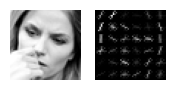

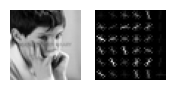

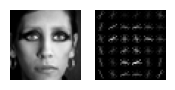

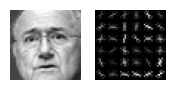

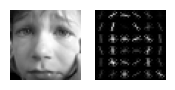

In [32]:
for i in range(2,7):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,1), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image_array[i].reshape(48,48), cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.imshow(hog_images[i], cmap=plt.cm.gray)
    plt.show()

<html>
<head>
</head>
<body>
<h1>
split the data to train and test
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_array, y, test_size=0.2, random_state=42)

<html>
<head>
</head>
<body>
<h1>
apply the Logistic Regression model and fit it
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [34]:
model = LogisticRegression(max_iter=1000)

In [35]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_predict = model.predict(X_test)

In [37]:
y_predict

array([0, 3, 4, ..., 3, 4, 2])

In [38]:
y_test

12365    0
5640     4
20979    4
15528    4
18323    3
        ..
8482     0
19828    2
16040    3
17672    3
21181    0
Name: target, Length: 4115, dtype: int32

In [39]:
test_list = y_test.to_list()

In [40]:
accuracy = accuracy_score(test_list,y_predict)
print(accuracy)

0.5134872417982989


<html>
<head>
</head>
<body>
<h1>
print the confusion matrix and plot it 
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

In [41]:
con = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con)

Confusion Matrix:
[[ 285    3  108  223  199]
 [  24    9   14   17   17]
 [ 136    6  281  169  198]
 [  96    3   89 1112  144]
 [ 156    8  149  243  426]]


In [42]:
# classes = model.classes_
# it will return 0 , 1 , 2 , 3 , 4   
classes = ['Angry','Disgust','Fear','Happy','Sad']

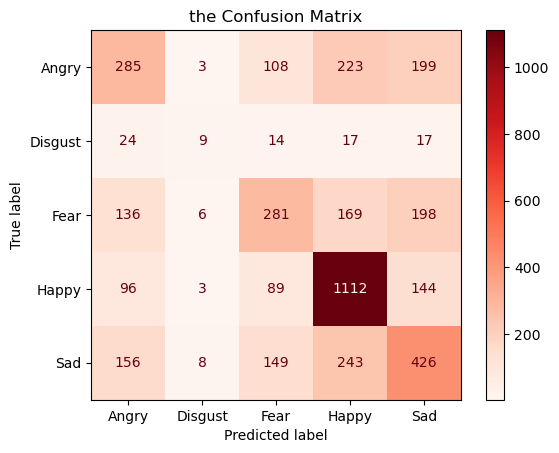

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=classes)
disp.plot(cmap='Reds')
plt.title('the Confusion Matrix')
plt.show()

<html>
<head>
</head>
<body>
<h1>
plot the ROC curve
</h1>
<style>
    h1{
        font-family: 'Alegreya Sans', sans-serif;
        background-color: #09c;
        text-align: center;
        border: 5px solid #000;
        transition: all .5s;
    }
    h1:hover {
    transform: scale(1.1);
}
</style>
</body>
</html>

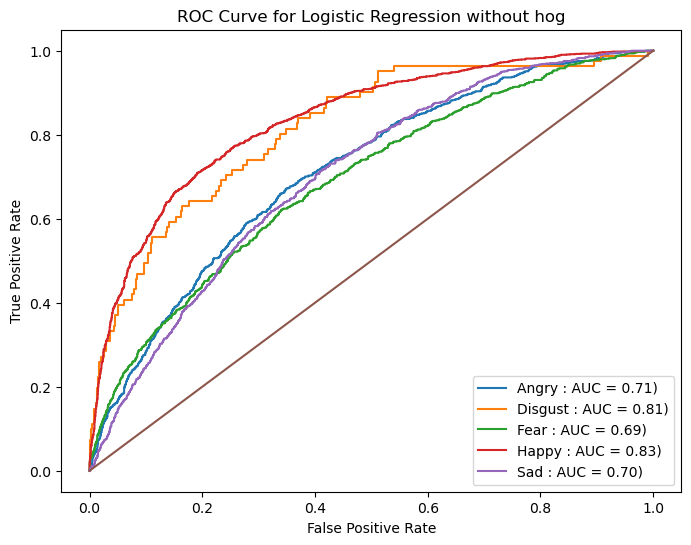

In [44]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
# Predict probabilities for each class
y_score = model.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = len(np.unique(y_train))

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
l = ['Angry','Disgust','Fear','Happy','Sad']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{l[i]} : AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1])  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression without hog')
plt.legend(loc='lower right')
plt.show()


In [45]:
len(X_train)

16458

In [46]:
len(X_test)

4115

In [52]:
import json
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their values
param_grid = [{'C': [0.1, 1, 10, 100, 1000], 
               'penalty': ['l1'],
               'solver': ['liblinear', 'saga']},
              {'C': [0.1, 1, 10, 100, 1000], 
               'penalty': ['l2'],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_grid, n_iter=10, n_jobs=-1, refit=True, verbose=3)

# Fit the model with the combinations of hyperparameters
random_search.fit(X_train, y_train) 

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Save the best parameters to a JSON file
with open('best_params2.json', 'w') as f:
    json.dump(random_search.best_params_, f)

# Predict using the model with the best parameters
y_predict = random_search.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'solver': 'sag', 'penalty': 'l2', 'C': 1}
Accuracy:  0.5134872417982989


In [50]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ", accuracy)

Accuracy:  0.5006075334143378


In [49]:
# Print the confusion matrix
con = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con)

Confusion Matrix:
[[ 258    0  112  243  205]
 [  21    1   15   23   21]
 [ 132    0  254  211  193]
 [  75    0   80 1135  154]
 [ 149    0  134  287  412]]
